In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

#print(sys.path)

In [2]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

In [3]:
# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot

In [4]:
# Setting parameters for simulation TODO make a config file for this.

d1 = 10; d2 = 200; E_spacing = 1.0; E_int = 0.055; E_int2 = 0; E_env = 1; E_env2 = 0; w = [0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0]; envi=[0]; tmax = 15; ind_nb = 100; log = 0
env_sys=0
# Running the simulation and running the core functions
result, tlist, H_list, ket_list, info = time_evo(d1,d2,E_spacing, E_int, E_int2, E_env, E_env2,w,envi, tmax, ind_nb,log)
eigen = eig(H_list)
s_list = compute_schmidt_states_all_time(result, ind_nb)
ss_list = s_list[0]
se_list= s_list[1]
sv_list = s_list[2]
s_full_list=s_list[3]

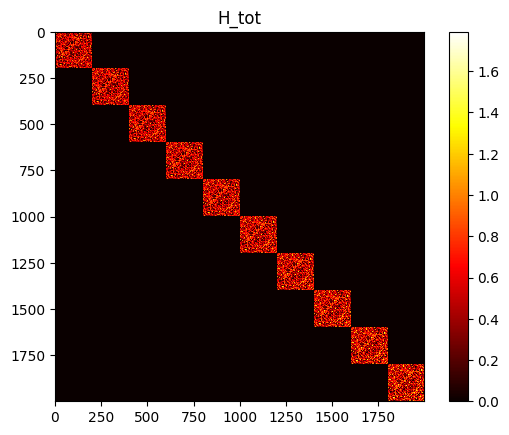

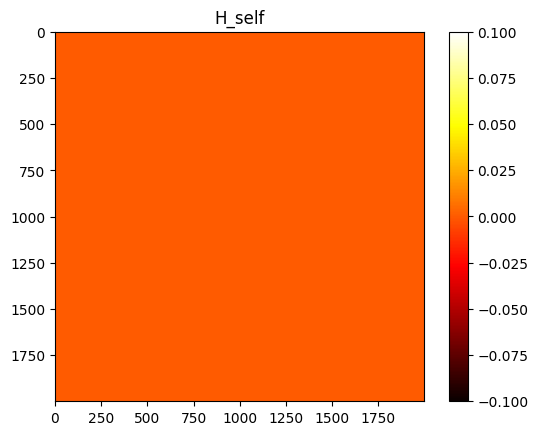

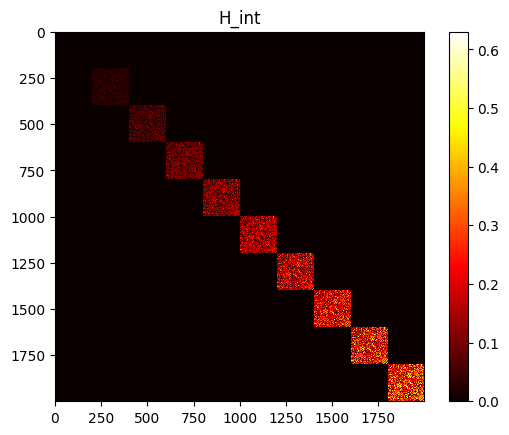

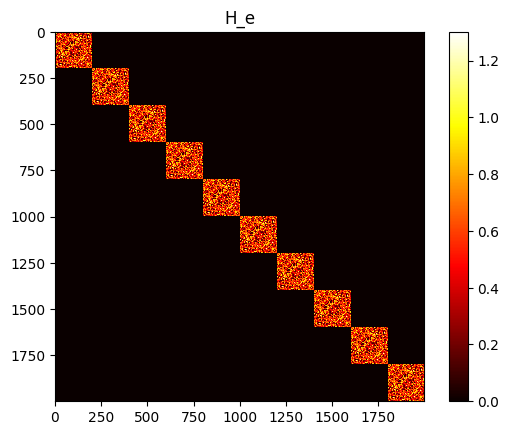

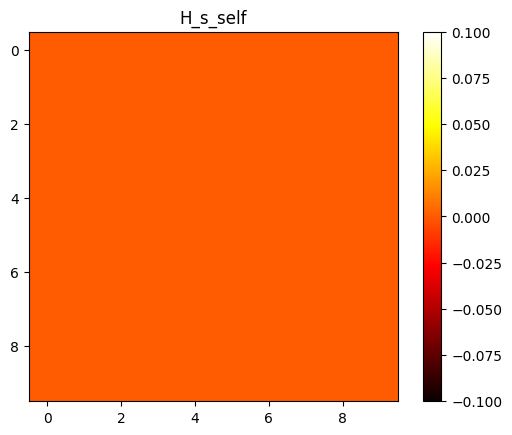

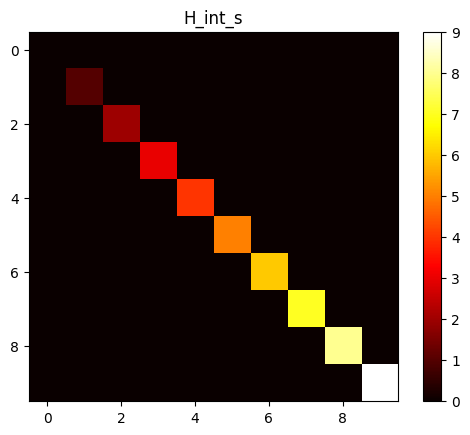

In [5]:
def plot_hamiltonians(H_list):
    H_tot=H_list[1].full()
    H_tot = abs(H_tot)
    H_s=H_list[2].full()
    H_s = abs(H_s)
    H_int=H_list[3].full()
    H_int = abs(H_int)
    H_e=H_list[4].full()
    H_e = abs(H_e)
    H_s_self=H_list[5].full()
    H_s_self = abs(H_s_self)
    H_int_s=H_list[6].full()
    H_int_s = abs(H_int_s)
    H_int_e=H_list[7].full()
    H_int_e = abs(H_int_e)
    H_e_self=H_list[8].full()
    H_e_self = abs(H_e_self)
    #d, H_total, H_s, H_int, H_e, H_s_self, H_int_s, H_int_e, H_e_self
    # Assuming H_system_2 is the matrix you want to visualize
    plt.imshow(H_tot, cmap='hot', interpolation='nearest')
    plt.title('H_tot')
    plt.colorbar()
    plt.show()

    plt.imshow(H_self, cmap='hot', interpolation='nearest')
    plt.title('H_self')
    plt.colorbar()
    plt.show()

    plt.imshow(H_int, cmap='hot', interpolation='nearest')
    plt.title('H_int')
    plt.colorbar()
    plt.show()

    plt.imshow(H_e, cmap='hot', interpolation='nearest')
    plt.title('H_e')
    plt.colorbar()
    plt.show()

    plt.imshow(H_s_self, cmap='hot', interpolation='nearest')
    plt.title('H_s_self')
    plt.colorbar()
    plt.show()

    plt.imshow(H_int_s, cmap='hot', interpolation='nearest')
    plt.title('H_int_s')
    plt.colorbar()

plot_hamiltonians(H_list)

In [ ]:
H_system_2_ext=H_system_2_ext.full()    
H_interaction=H_interaction.full()  
plt.imshow(abs(H_system_2_ext), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(abs(H_interaction), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
A = np.dot(H_system_2_ext,H_interaction)-np.dot(H_interaction,H_system_2_ext)
shatten = shatten_p(A,2)
print(shatten)
max_value = np.max(np.abs(A))
print(max_value)
plt.imshow(abs(A), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

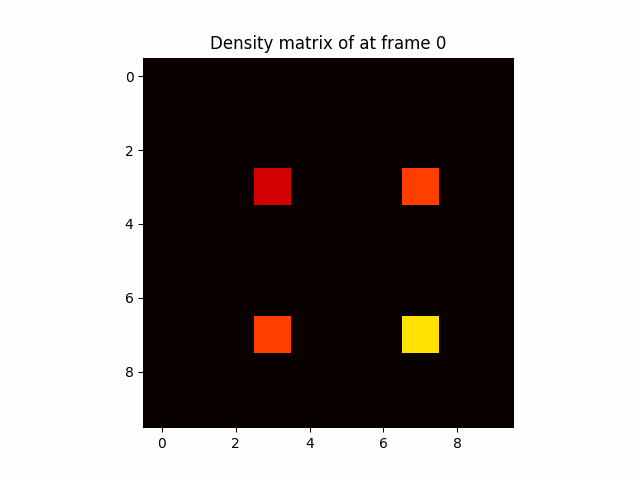

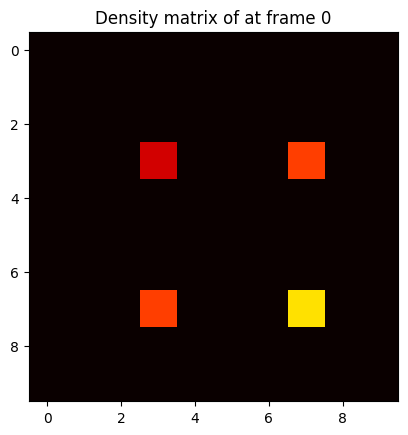

In [14]:
from IPython.display import Image
import matplotlib.animation as animation
from matplotlib.colors import Normalize
s=0
# Define the function to update the plot for each frame
def update(frame):

    ss=ss_list[frame]
    se=se_list[frame]
    sv=sv_list[frame]
    state = qt.Qobj(ss[s])
    density_matrix = state * state.dag()
    r_density_matrix = abs(density_matrix.full())
    plt.imshow(r_density_matrix, cmap='hot', interpolation='nearest',norm=Normalize(vmin=0, vmax=1))
    plt.title(f'Density matrix of at frame {frame}')    
# Create the animation
fig = plt.figure()
ani = animation.FuncAnimation(fig, update, frames=len(result.states), interval=100)
# Save the animation as a GIF file
path=f'../outputs/gifs/density_matrix_{s}.gif'
ani.save(path, writer='pillow')

# Display the GIF
Image(filename=path)


In [ ]:
from IPython.display import Image
import matplotlib.animation as animation
s = 0
# Define the function to update the plot for each frame
def update(frame):

    ss, se, sv = compute_schmidt_states_new(result, frame)
    state = qt.Qobj(se[s])
    density_matrix = state * state.dag()
    r_density_matrix = abs(density_matrix.full())
    plt.imshow(r_density_matrix, cmap='hot', interpolation='nearest')
    plt.title(f'Density matrix at frame {frame}')    
# Create the animation
fig = plt.figure()
ani = animation.FuncAnimation(fig, update, frames=len(result.states), interval=100)
# Save the animation as a GIF file
ani.save(f'Gifs/density_matrix_{s}.gif', writer='pillow')

# Specify the path to the GIF file
gif_path = f'Gifs/density_matrix_{s}.gif'

# Display the GIF
Image(filename=gif_path)


In [ ]:

import matplotlib.pyplot as plt
a=H_system_2.full()
a = abs(a)
# Assuming H_system_2 is the matrix you want to visualize
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

a=H_system_1.full()
a = abs(a)
# Assuming H_system_2 is the matrix you want to visualize
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


In [ ]:
dim_system_1=10
energy_spacing = 1
diagonal_elements = np.arange(0, dim_system_1) * energy_spacing
H_q = qt.Qobj(np.diag(diagonal_elements)) # Create a diagonal matrix with increasing diagonal elements
H_q=abs(H_q.full())
plt.imshow(H_q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
def _rand_herm_sparse(N, density, pos_def):
    target = (1-(1-density)**0.5)
    num_elems = (N**2 - 0.666 * N) * target + 0.666 * N * density
    num_elems = max([num_elems, 1])
    num_elems = int(num_elems)
    data = (2 * np.random.rand(num_elems) - 1) + \
           (2 * np.random.rand(num_elems) - 1) * 1j
    row_idx, col_idx = zip(*[
        divmod(index, N)
        for index in np.random.choice(N*N, num_elems, replace=False)
    ])
    M = sp.coo_matrix((data, (row_idx, col_idx)),
                      dtype=complex, shape=(N, N))
    M = 0.5 * (M + M.conj().transpose())
    if pos_def:
        M = M.tocoo()
        M.setdiag(np.abs(M.diagonal()) + np.sqrt(2)*N)
    M = M.tocsr()
    M.sort_indices()
    return M